In [ ]:
!pip3 install scipy==1.1.0
!pip3 install sklearn==1.1.0
!pip3 install matplotlib


# You need to restart the Runtime after installing the scipy

ERROR: Could not find a version that satisfies the requirement sklearn==1.1.0 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==1.1.0


In [ ]:
%matplotlib inline
import PIL

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
import sys

In [ ]:
!unzip ./ocr.zip
!unzip ./training_type.zip

Streaming output truncated to the last 5000 lines.
 extracting: training_type/b/942_snippet.png  
 extracting: training_type/b/956_snippet.png  
 extracting: training_type/b/967_snippet.png  
 extracting: training_type/b/976_snippet.png  
  inflating: training_type/b/977_snippet.png  
 extracting: training_type/b/993_snippet.png  
   creating: training_type/c/
 extracting: training_type/c/1004_snippet.png  
 extracting: training_type/c/1029_snippet.png  
 extracting: training_type/c/1039_snippet.png  
 extracting: training_type/c/1055_snippet.png  
 extracting: training_type/c/1065_snippet.png  
 extracting: training_type/c/1090_snippet.png  
 extracting: training_type/c/1100_snippet.png  
 extracting: training_type/c/1116_snippet.png  
 extracting: training_type/c/1126_snippet.png  
 extracting: training_type/c/1151_snippet.png  
 extracting: training_type/c/1161_snippet.png  
 extracting: training_type/c/1177_snippet.png  
 extracting: training_type/c/1187_snippet.png  
 extracting: 

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
#             print ('Characters recognized: ' + str(len(final)))
        return final
    
    def __init__(self):
        print("Extracting characters...")


start_time = time.time()
extract = Extract_Letters()
# training_files = ['./ocr/training/training1.png', './ocr/training/training2.png','./ocr/training/training3.png','./ocr/training/training4.png','./ocr/training/training6.png']
training_files = ['/content/ocr/training/training1.png', '/content/ocr/training/training2.png','/content/ocr/training/training3.png','/content/ocr/training/training4.png','/content/ocr/training/training6.png']


trainingSet=[]
trainingTarget=[]


folder_string = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'
name_counter = 600
for files in training_files:
    letters = extract.extractFile(files)
    string_counter = 0

    for i in letters:
        if string_counter > 60:
            string_counter = 0
        imsave('/content/training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        trainingSet.append(np.asarray(i.flatten()))
        trainingTarget.append(folder_string[string_counter])
        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )

Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


5.751410961151123 seconds


In [ ]:
print(len(trainingSet))
print(len(trainingTarget))
print(trainingSet[0].shape)

2745
2745
(400,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
# from keras.models import Sequential
# from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
# import keras
from sklearn.neural_network import MLPClassifier
# from keras.models import Sequential
# from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
# import keras
# model 1 - mlp(NN)
nn=MLPClassifier(solver='sgd', max_iter=500, alpha=1e-4,
                     hidden_layer_sizes=(100,100,100), random_state=21, tol=0.000000001)
nn.fit(trainingSet, trainingTarget)

# CREating a test NN
# def nonlin(x,deriv=False):
#     if(deriv):
#         return x*(1-x)
#     return 1/(1+np.exp(-x))
# syn0=2*np.random.random((400,400))-1
# print(len(trainingSet))
# print(len(syn0))
# testingSet=trainingSet
# # print(len(nonlin(np.dot(trainingSet, syn0))))
# # model 1 - neural network
# for x in range(100):
#     l0=trainingSet
#     l1=nonlin(np.dot(l0, syn0))
#     l1_err= testingSet-l1
#     l1_delta=l1_err*nonlin(l1,True)
#     syn0+=np.dot(np.asarray(l0).T, l1_delta)

# print("OUTPUT:")
# print(np.asarray(l1, dtype=np.uint8))

# CREATING A CNN
# model=Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(20,20,1)))
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(61, activation='softmax', use_bias=True))
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# model.summary()
# modek_train=model.fit(trainingSet, trainingTarget, batch_size=batch_size, epochs=epochs, validation_data=(testingSet, testingTarget))
# model.save_weights("classsifiers/model.h5")
# with open('model_arch.json', 'w') as f:
#         f.write(model.to_json())
# print("Saved Model")
# del model
# from keras.models import model_from_json
# with open('model arch.json', 'r') as f:
#     model = model_from_json(f.read())
# res=model.predict(testingSet)
# print(model.history['accuracy'])
# print(model.history['val_accuracy'])

knn_clf=KNeighborsClassifier(n_jobs=1, weights='distance', n_neighbors=4)
knn_clf.fit(trainingSet, trainingTarget)

print(knn_clf.predict([trainingSet[0]]))
from sklearn.model_selection import cross_val_score


#model 2- svm
svm_clf=svm.SVC()
svm_clf.fit(trainingSet, trainingTarget)




# model 3 - rfc
rfc=RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)
rfc.fit(trainingSet, trainingTarget)
rfc_score= cross_val_score(rfc, trainingSet, trainingTarget, cv=3, scoring="accuracy")
# acc=rfc.predict([trainingSet[0]])
# print(acc)
# print(f"RFC ACCuracy: %f", rfc_score)
# testing_files = ['./ocr/testing/adobe.png', './ocr/testing/shazam.png', './text.png']
testing_files = ['/content/ocr/testing/adobe.png', '/content/ocr/testing/shazam.png', '/content/text.png']
testingSet=[]

all_files_mlp=[]
all_files_knn=[]
all_files_knn_class=[]
all_files_rfc_class=[]
all_files_svm_class=[]
all_files_mlp_class=[]

all_files_rfc=[]
all_files_svm=[]
for files in testing_files:
    test=extract.extractFile(files)
    file_data=[]
    count=0
    for i in test:
        value_mlp=nn.predict([np.asarray(i.flatten())])
        value_knn=knn_clf.predict([np.asarray(i.flatten())])
        value_svm=svm_clf.predict([np.asarray(i.flatten())])
        value_rfc=rfc.predict([np.asarray(i.flatten())])
        all_files_mlp.append(value_mlp)
        all_files_mlp_class.append(value_mlp)
        all_files_knn.append(value_knn)
        all_files_knn_class.append(value_knn)
        all_files_svm.append(value_svm)
        all_files_svm_class.append(value_svm)
        all_files_rfc.append(value_rfc)
        all_files_rfc_class.append(value_rfc)
    all_files_mlp.append("---------")
    all_files_knn.append("---------")
    all_files_rfc.append("---------")
    all_files_svm.append("---------")

print("KNN")   
print(np.asarray(all_files_knn, dtype='object'))
# print(all_files_knn)
print("\n\n\n")
temp = cross_val_score(knn_clf, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("KNN Acc:", temp)
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


['a']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  
/usr/local/lib/python3.6/dist-packages/ipykernel_l

KNN
[array(['i'], dtype='<U1') array(['n'], dtype='<U1')
 array(['a'], dtype='<U1') array(['r'], dtype='<U1')
 array(['e'], dtype='<U1') array(['s'], dtype='<U1')
 array(['u'], dtype='<U1') array(['l'], dtype='<U1')
 array(['a'], dtype='<U1') array(['t'], dtype='<U1')
 array(['o'], dtype='<U1') array(['r'], dtype='<U1')
 array(['y'], dtype='<U1') array(['d'], dtype='<U1')
 array(['o'], dtype='<U1') array(['c'], dtype='<U1')
 array(['u'], dtype='<U1') array(['m'], dtype='<U1')
 array(['e'], dtype='<U1') array(['n'], dtype='<U1')
 array(['t'], dtype='<U1') array(['f'], dtype='<U1')
 array(['i'], dtype='<U1') array(['l'], dtype='<U1')
 array(['e'], dtype='<U1') array(['d'], dtype='<U1')
 array(['w'], dtype='<U1') array(['i'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['e'], dtype='<U1') array(['s'], dtype='<U1')
 array(['e'], dtype='<U1') array(['c'], dtype='<U1')
 array(['t'], dtype='<U1') array(['o'], dt

LEARNING CURVE KNN


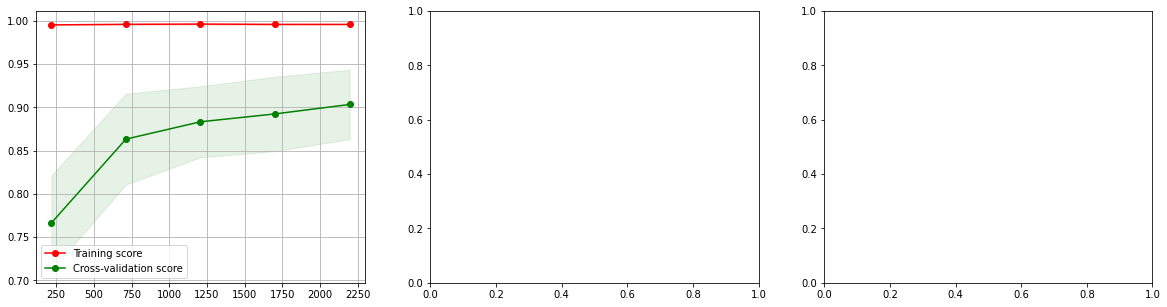

In [ ]:
print("LEARNING CURVE KNN")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(knn_clf,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

In [ ]:
print("MLP")   
print(np.asarray(all_files_mlp, dtype='object'))
print("\n\n\n")
temp = cross_val_score(nn, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("MLP Acc:", temp)
print("\n\n\n\n\n")

# From the logs the accuracy for MLP
#   self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
# MLP Acc: [0.30491803 0.03278689 0.03278689]


print("LEARNING CURVE MLP")
learn_svm_train_Size, learn_svm_TrainScore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(nn,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_TrainScore, axis=1)
train_score_std=np.std(learn_svm_TrainScore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

# _, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[1].grid()
axes[1].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[1].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[1].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[1].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[1].legend(loc="best")
plt.show()

MLP
[array(['i'], dtype='<U1') array(['n'], dtype='<U1')
 array(['a'], dtype='<U1') array(['r'], dtype='<U1')
 array(['e'], dtype='<U1') array(['g'], dtype='<U1')
 array(['u'], dtype='<U1') array(['l'], dtype='<U1')
 array(['a'], dtype='<U1') array(['t'], dtype='<U1')
 array(['o'], dtype='<U1') array(['r'], dtype='<U1')
 array(['y'], dtype='<U1') array(['d'], dtype='<U1')
 array(['o'], dtype='<U1') array(['c'], dtype='<U1')
 array(['u'], dtype='<U1') array(['m'], dtype='<U1')
 array(['e'], dtype='<U1') array(['n'], dtype='<U1')
 array(['t'], dtype='<U1') array(['f'], dtype='<U1')
 array(['i'], dtype='<U1') array(['l'], dtype='<U1')
 array(['e'], dtype='<U1') array(['d'], dtype='<U1')
 array(['w'], dtype='<U1') array(['i'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['e'], dtype='<U1') array(['s'], dtype='<U1')
 array(['e'], dtype='<U1') array(['c'], dtype='<U1')
 array(['t'], dtype='<U1') array(['o'], dt

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Acc: [0.90163934 0.92349727 0.83825137]






LEARNING CURVE MLP


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SVM
[array(['i'], dtype='<U1') array(['n'], dtype='<U1')
 array(['a'], dtype='<U1') array(['r'], dtype='<U1')
 array(['e'], dtype='<U1') array(['9'], dtype='<U1')
 array(['u'], dtype='<U1') array(['i'], dtype='<U1')
 array(['a'], dtype='<U1') array(['t'], dtype='<U1')
 array(['o'], dtype='<U1') array(['r'], dtype='<U1')
 array(['y'], dtype='<U1') array(['d'], dtype='<U1')
 array(['o'], dtype='<U1') array(['c'], dtype='<U1')
 array(['u'], dtype='<U1') array(['m'], dtype='<U1')
 array(['e'], dtype='<U1') array(['n'], dtype='<U1')
 array(['t'], dtype='<U1') array(['f'], dtype='<U1')
 array(['i'], dtype='<U1') array(['i'], dtype='<U1')
 array(['e'], dtype='<U1') array(['d'], dtype='<U1')
 array(['w'], dtype='<U1') array(['i'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['e'], dtype='<U1') array(['s'], dtype='<U1')
 array(['e'], dtype='<U1') array(['c'], dtype='<U1')
 array(['t'], dtype='<U1') array(['o'], dt

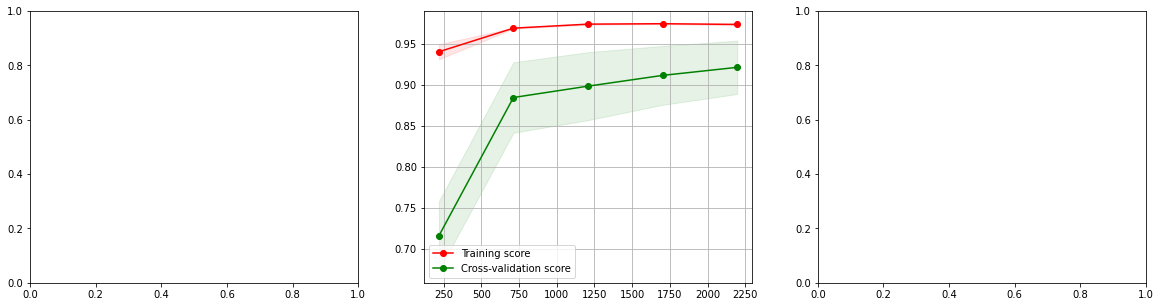

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>


In [ ]:
print("SVM")   
print(np.asarray(all_files_svm, dtype='object'))
print("\n\n\n")
temp = cross_val_score(svm_clf, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("SVM Acc:", temp)


# cur=roc_curve(trainingTarget, temp)
# print(testingSet[0])
# print(all_files_knn[0])
# print(np.asarray(testingSet).shape)
# print(np.asarray(all_files_knn, dtype='object').shape)
# print("COMPARE KNN AND SVM")
# cur=classification_report(all_files_knn, all_files_svm)
# print(cur)

print("LEARNING CURVE SVM")
learn_svm_train_Size, learn_svm_TrainScore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(svm_clf,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_TrainScore, axis=1)
train_score_std=np.std(learn_svm_TrainScore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[1].grid()
axes[1].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[1].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[1].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[1].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[1].legend(loc="best")
plt.show()
print(plt)

RFC
[array(['i'], dtype='<U1') array(['n'], dtype='<U1')
 array(['a'], dtype='<U1') array(['r'], dtype='<U1')
 array(['e'], dtype='<U1') array(['s'], dtype='<U1')
 array(['u'], dtype='<U1') array(['l'], dtype='<U1')
 array(['a'], dtype='<U1') array(['t'], dtype='<U1')
 array(['o'], dtype='<U1') array(['r'], dtype='<U1')
 array(['y'], dtype='<U1') array(['d'], dtype='<U1')
 array(['o'], dtype='<U1') array(['c'], dtype='<U1')
 array(['u'], dtype='<U1') array(['m'], dtype='<U1')
 array(['e'], dtype='<U1') array(['n'], dtype='<U1')
 array(['t'], dtype='<U1') array(['f'], dtype='<U1')
 array(['i'], dtype='<U1') array(['l'], dtype='<U1')
 array(['e'], dtype='<U1') array(['d'], dtype='<U1')
 array(['w'], dtype='<U1') array(['i'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['t'], dtype='<U1') array(['h'], dtype='<U1')
 array(['e'], dtype='<U1') array(['s'], dtype='<U1')
 array(['e'], dtype='<U1') array(['c'], dtype='<U1')
 array(['t'], dtype='<U1') array(['o'], dt

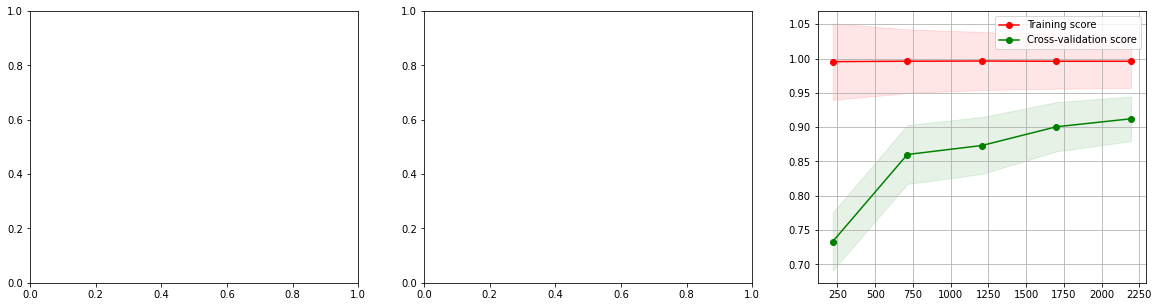

In [ ]:
print("RFC")   
print(np.asarray(all_files_rfc, dtype='object'))
print("\n\n\n")
temp = cross_val_score(rfc, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("RFC Acc:", temp)
# cur=roc_curve(trainingTarget, temp)
# print(cur)
# print("COMPARE KNN AND RFC")
# cur=classification_report(all_files_knn, all_files_rfc)
# print(cur)
# print("COMPARE RFC AND SVM")
# cur=classification_report(all_files_rfc, all_files_svm)
# print(cur)

print("LEARNING CURVE RFC")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(rfc,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
train_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[2].grid()
axes[2].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[2].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[2].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[2].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[2].legend(loc="best")
plt.show()

In [ ]:
from sklearn.metrics import classification_report



# cur=roc_curve(trainingTarget, temp)
# print(testingSet[0])
# print(all_files_knn[0])
# print(np.asarray(testingSet).shape)
# print(np.asarray(all_files_knn, dtype='object').shape)
print("COMPARE KNN AND SVM")
cur=classification_report(all_files_knn_class, all_files_svm_class)
print(cur)



COMPARE KNN AND SVM
              precision    recall  f1-score   support

           1       1.00      0.10      0.17        21
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.06      1.00      0.12         2
           a       0.97      1.00      0.98       273
           b       0.95      1.00      0.97        58
           c       1.00      0.99      0.99       145
           d       0.98      0.94      0.96       137
           e       1.00      1.00      1.00       318
           f       1.00      0.99      0.99        68
           g       0.98      1.00      0.99        61
           h       0.94      0.95      0.94       106
       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("COMPARE RFC AND MLP")
cur=classification_report(all_files_rfc_class, all_files_mlp_class)
print(cur)


COMPARE RFC AND MLP
              precision    recall  f1-score   support

           1       0.24      1.00      0.38         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.06      1.00      0.12         1
           9       0.67      1.00      0.80         2
           a       0.95      0.81      0.88       284
           b       0.68      1.00      0.81        54
           c       1.00      0.99      0.99       144
           d       0.65      0.58      0.61       204
           e       1.00      1.00      1.00       318
           f       0.99      1.00      0.99        67
           g       0.60      0.75      0.67        61
           h       0.90      1.00      0.95        99
       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN CONF MATRIX


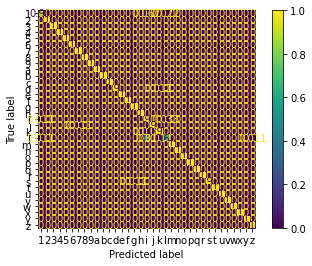

In [ ]:
from sklearn.metrics import plot_confusion_matrix
nn_cfm= plot_confusion_matrix(nn, trainingSet, trainingTarget, normalize='true')
print("NN CONF MATRIX")
nn_cfm

KNN CONF MATRIX


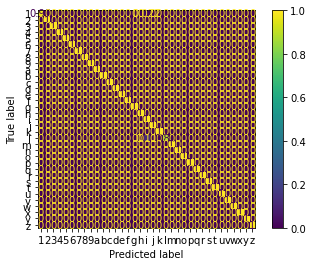

In [ ]:
knn_cfm= plot_confusion_matrix(knn_clf, trainingSet, trainingTarget, normalize='true')
print("KNN CONF MATRIX")
knn_cfm

SVM CONF MATRIX


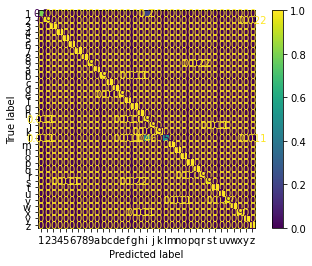

In [ ]:
svm_cfm= plot_confusion_matrix(svm_clf, trainingSet, trainingTarget, normalize='true')
print("SVM CONF MATRIX")
svm_cfm

RFC CONF MATRIX


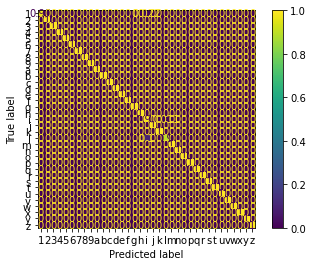

In [ ]:
rfc_cfm= plot_confusion_matrix(rfc, trainingSet, trainingTarget, normalize='true')
print("RFC CONF MATRIX")
rfc_cfm

In [ ]:

rfc_vs_svm_rep=classification_report(all_files_rfc_class, all_files_svm_class)
print(rfc_vs_svm_rep)

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.06      1.00      0.12         2
           a       0.97      0.96      0.96       284
           b       0.89      1.00      0.94        54
           c       1.00      0.99      1.00       144
           d       0.91      0.58      0.71       204
           e       1.00      1.00      1.00       318
           f       1.00      1.00      1.00        67
           g       0.98      1.00      0.99        61
           h       0.92      1.00      0.96        99
           i       0.87    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_vs_rfc_rep=classification_report(all_files_knn_class, all_files_rfc_class)
print(knn_vs_rfc_rep)

              precision    recall  f1-score   support

           1       1.00      0.24      0.38        21
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
           a       0.96      1.00      0.98       273
           b       1.00      0.93      0.96        58
           c       1.00      0.99      1.00       145
           d       0.59      0.88      0.70       137
           e       1.00      1.00      1.00       318
           f       1.00      0.99      0.99        68
           g       1.00      1.00      1.00        61
           h       1.00      0.93      0.97       106
           i       0.89      1.00      0.94       295
           j       1.00    

In [ ]:
rfc_vs_mlp_rep=classification_report(all_files_rfc_class, all_files_mlp_class)
print(rfc_vs_mlp_rep)

              precision    recall  f1-score   support

           1       0.24      1.00      0.38         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.06      1.00      0.12         1
           9       0.67      1.00      0.80         2
           a       0.95      0.81      0.88       284
           b       0.68      1.00      0.81        54
           c       1.00      0.99      0.99       144
           d       0.65      0.58      0.61       204
           e       1.00      1.00      1.00       318
           f       0.99      1.00      0.99        67
           g       0.60      0.75      0.67        61
           h       0.90      1.00      0.95        99
           i       0.93    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# # Greek letters
# trainingSet2=[]
# trainingTarget2=[]
# training_file=['/content/Greek.png']
# folder_String='ΑαΒβΓγΔδΕεΖζΗηΘθΙιΚκΛλΜμΝνΞξΟοΠπΡρΣσςΤτΥυΦφΧχΨψΩω'

# print(len(folder_String))
# name_counter = 1600
# for files in training_file:
#     letters = extract.extractFile(files)
#     string_counter = 0

#     for i in letters:
#         if string_counter > 48:
#             string_counter = 0
#         # imsave('./training_type/' + str(folder_String[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
#         trainingSet2.append(np.asarray(i.flatten()))
#         trainingTarget2.append(folder_String[string_counter])
#         string_counter += 1
#         name_counter += 1
# print(len(trainingSet2))
# print(len(trainingTarget2))

# from sklearn.model_selection import train_test_split


49


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


FileNotFoundError: ignored

In [ ]:
# from PIL import Image,ImageDraw,ImageFont

# !unzip DroidSansFallbackFull.ttf.zip
# DroidSansFallbackFull = ImageFont.truetype("/content/DroidSansFallbackFull.ttf", 36, 0)
# charset=u"Α α Β β Γ γ Δ δ Ε ε Ζ ζ Η η Θ θ Ι ι Κ κ Λ λ Μ μ Ν ν Ξ \nξ Ο ο Π π Ρ ρ Σ σ ς Τ τ Υ υ Φ φ Χ χ Ψ ψ Ω ω"
# trainLabels=u"ΑαΒβΓγΔδΕεΖζΗηΘθΙιΚκΛλΜμΝνΞξΟοΠπΡρΣσςΤτΥυΦφΧχΨψΩω"
# x=len(charset)
# trainSet2=[]
# testSet2=[]
# # for i in range(0,x):



In [ ]:
# from PIL import Image
# from PIL import ImageFont, ImageDraw
# image=Image.new("RGB",[200,200])
# draw = ImageDraw.Draw(image)
# trainingSet2=[]
# trainingTarget2=[]
# testingSet2=[]
# testingTarget2=[]
# !mkdir Greek
# for i in trainLabels:
#   image=Image.new("RGB",[200,200])
#   draw = ImageDraw.Draw(image)
#   font=ImageFont.truetype("/content/DroidSansFallbackFull.ttf",48)
#   # font=ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf",14)
#   draw.text((50, 50), i, font=font)
#   image.save("/content/Greek/"+i+"1.png")
#   trainingSet2.append(i)
#   trainingTarget2.append(i)
#   draw.rectangle((0, 0, 200, 200), fill=(0, 0, 0, 0))

#   font=ImageFont.truetype("/content/arial.ttf", 48)
#   draw.text((50, 50), i, font=font)
#   image.save("/content/Greek/"+i+"2.png")
#   trainingSet2.append(i)
#   trainingTarget2.append(i)
#   draw.rectangle((0, 0, 200, 200), fill=(0, 0, 0, 0))

#   font=ImageFont.truetype("/content/Roboto-Bold.ttf", 48)
#   draw.text((50, 50), i, font=font)
#   image.save("/content/Greek/"+i+"3.png")
#   trainingSet2.append(i)
#   trainingTarget2.append(i)
#   draw.rectangle((0, 0, 200, 200), fill=(0, 0, 0, 0))



# # extractorGreek= Extract_Letters()
# # extractGreek=extractorGreek.extractFiles("a.png")
# print(len(trainingSet2))
# print(trainingSet2[0])
# print(trainingTarget2[0])


In [ ]:
# # for i in range(0, len(trainLabels)):
# for i in range(0, 1):

#   for j in range(1,3):
#     filepath="/content/Greek/"+str(trainLabels[i])+str(j)+".png"
#     image=imread(filepath,1)
#     bw = (image < 120).astype(np.float)
#     # remove artifacts connected to image border
#     cleared = bw.copy()
#     # clear_border(cleared)

#     # label image regions
#     label_image = label(cleared, neighbors=8)
#     borders = np.logical_xor(bw, cleared)
#     label_image[borders] = -1
#     act_img=imresize(label_image, (20,20))
#     print(act_img)
Greek_training=["/content/Greek1.png","/content/Greek2.png"]
Greek_testing=["/content/Greek3.png"]
testingSet2=[]
testingTarget2=[]

name_counter = 1600
for files in Greek_training:
    letters = extract.extractFile(files)
    string_counter = 0

    for i in letters:
        if string_counter > 48:
            string_counter = 0
        # imsave('./training_type/' + str(folder_String[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        trainingSet2.append(np.asarray(i.flatten()))
        trainingTarget2.append(folder_String[string_counter])
        string_counter += 1
        name_counter += 1
print(len(trainingSet2))
print(len(trainingTarget2))
for files in Greek_testing:
    letters = extract.extractFile(files)
    string_counter = 0

    for i in letters:
        if string_counter > 48:
            string_counter = 0
        # imsave('./training_type/' + str(folder_String[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        testingSet2.append(np.asarray(i.flatten()))
        testingTarget2.append(folder_String[string_counter])
        string_counter += 1
        name_counter += 1
print(len(testingSet2))
print(len(testingTarget2))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  


1648
1648
383
383


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


['ο']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  


KNN
[array(['Α'], dtype='<U1') array(['α'], dtype='<U1')
 array(['Β'], dtype='<U1') array(['β'], dtype='<U1')
 array(['Γ'], dtype='<U1') array(['γ'], dtype='<U1')
 array(['Δ'], dtype='<U1') array(['δ'], dtype='<U1')
 array(['Ε'], dtype='<U1') array(['ε'], dtype='<U1')
 array(['Ζ'], dtype='<U1') array(['ζ'], dtype='<U1')
 array(['Η'], dtype='<U1') array(['η'], dtype='<U1')
 array(['Θ'], dtype='<U1') array(['θ'], dtype='<U1')
 array(['Ι'], dtype='<U1') array(['ι'], dtype='<U1')
 array(['Κ'], dtype='<U1') array(['κ'], dtype='<U1')
 array(['Λ'], dtype='<U1') array(['λ'], dtype='<U1')
 array(['Μ'], dtype='<U1') array(['μ'], dtype='<U1')
 array(['Ν'], dtype='<U1') array(['Ν'], dtype='<U1')
 array(['Ξ'], dtype='<U1') array(['ξ'], dtype='<U1')
 array(['ο'], dtype='<U1') array(['ο'], dtype='<U1')
 array(['Π'], dtype='<U1') array(['π'], dtype='<U1')
 array(['Ρ'], dtype='<U1') array(['ρ'], dtype='<U1')
 array(['Σ'], dtype='<U1') array(['σ'], dtype='<U1')
 array(['ς'], dtype='<U1') array(['Τ'], dt

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN Acc: [0.83939394 0.52727273 0.38787879 0.86322188 0.14893617]
LEARNING CURVE KNN


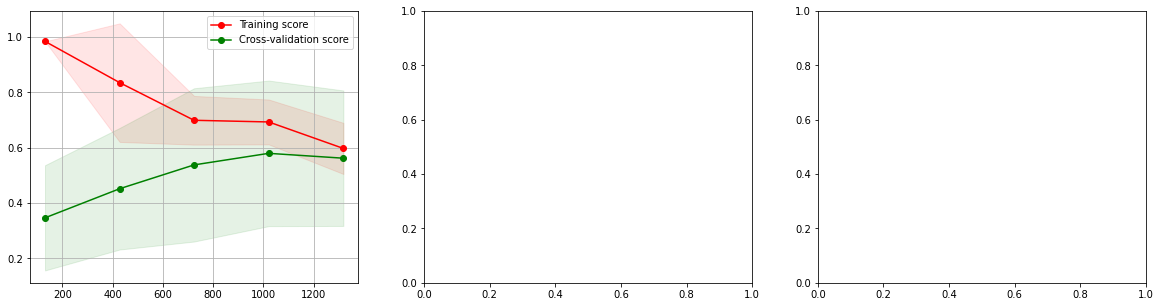

In [ ]:
# trainingSet2, trainingTarget2, testingSet2, testingTarget2 = train_test_split(trainingSet2,trainingTarget2, test_size=0.5, random_state=42)
testLabels=list(folder_String)
# print(len(trainingSet2))
# print(len(trainingTarget2))

nn2=MLPClassifier(solver='sgd', max_iter=500, alpha=1e-2,
                     hidden_layer_sizes=(100,100,100), validation_fraction=0.3)
nn2.fit(trainingSet2, trainingTarget2)

# CREating a test NN
# def nonlin(x,deriv=False):
#     if(deriv):
#         return x*(1-x)
#     return 1/(1+np.exp(-x))
# syn0=2*np.random.random((400,400))-1
# print(len(trainingSet))
# print(len(syn0))
# testingSet=trainingSet
# # print(len(nonlin(np.dot(trainingSet, syn0))))
# # model 1 - neural network
# for x in range(100):
#     l0=trainingSet
#     l1=nonlin(np.dot(l0, syn0))
#     l1_err= testingSet-l1
#     l1_delta=l1_err*nonlin(l1,True)
#     syn0+=np.dot(np.asarray(l0).T, l1_delta)

# print("OUTPUT:")
# print(np.asarray(l1, dtype=np.uint8))

# CREATING A CNN
# model=Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(20,20,1)))
# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(61, activation='softmax', use_bias=True))
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# model.summary()
# modek_train=model.fit(trainingSet, trainingTarget, batch_size=batch_size, epochs=epochs, validation_data=(testingSet, testingTarget))
# model.save_weights("classsifiers/model.h5")
# with open('model_arch.json', 'w') as f:
#         f.write(model.to_json())
# print("Saved Model")
# del model
# from keras.models import model_from_json
# with open('model arch.json', 'r') as f:
#     model = model_from_json(f.read())
# res=model.predict(testingSet)
# print(model.history['accuracy'])
# print(model.history['val_accuracy'])

knn_clf2=KNeighborsClassifier(n_jobs=1, weights='distance', n_neighbors=4)
knn_clf2.fit(trainingSet2, trainingTarget2)

print(knn_clf2.predict([trainingSet[0]]))
from sklearn.model_selection import cross_val_score


#model 3- svm
svm_clf2=svm.SVC(gamma=0.001)
svm_clf2.fit(trainingSet2, trainingTarget2)




# model 3 - rfc
rfc2=RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)
rfc2.fit(trainingSet2, trainingTarget2)
rfc_score= cross_val_score(rfc2, trainingSet2, trainingTarget2, cv=3, scoring="accuracy")
# acc=rfc.predict([trainingSet[0]])
# print(acc)
# print(f"RFC ACCuracy: %f", rfc_score)
# start_Test=(len(trainingSet2))
# start_Test=(int)(start_Test*0.5)
# # end_Test=(int)0.75*(len(trainingSet))
# testingSet=trainingSet2[start_Test:]
letters = extract.extractFile("/content/Greek3.png")
string_counter = 0

for i in letters:
    if string_counter > 48:
        string_counter = 0
    # imsave('./training_type/' + str(folder_String[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
    testingSet2.append(np.asarray(i.flatten()))
    testingTarget2.append(folder_String[string_counter])
    string_counter += 1
    name_counter += 1


all_files_mlp=[]
all_files_knn=[]
all_files_rfc=[]
all_files_svm=[]
all_files_mlp_class=[]
all_files_knn_class=[]
all_files_rfc_class=[]
all_files_svm_class=[]
for i in testingSet2:
  value_mlp=nn2.predict([np.asarray(i.flatten())])
  value_knn=knn_clf2.predict([np.asarray(i.flatten())])
  value_svm=svm_clf2.predict([np.asarray(i.flatten())])
  value_rfc=rfc2.predict([np.asarray(i.flatten())])
  all_files_mlp.append(value_mlp)
  all_files_knn.append(value_knn)
  all_files_svm.append(value_svm)
  all_files_rfc.append(value_rfc)
  all_files_mlp_class.append(value_mlp)
  all_files_knn_class.append(value_knn)
  all_files_svm_class.append(value_svm)
  all_files_rfc_class.append(value_rfc)
all_files_mlp.append("---------")
all_files_knn.append("---------")
all_files_rfc.append("---------")
all_files_svm.append("---------")

print("KNN")   
print(np.asarray(all_files_knn, dtype='object'))
# print(all_files_knn)
print("\n\n\n")
temp = cross_val_score(knn_clf2, trainingSet2, trainingTarget2, cv=3, scoring="accuracy")
print("KNN Acc:", temp)

print("\n\n\n")
temp = cross_val_score(nn2, trainingSet2, trainingTarget2, cv=5, scoring="accuracy")
print("NN Acc:", temp)

print("LEARNING CURVE KNN")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(knn_clf2,trainingSet2, trainingTarget2, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
# plt.show()





# # model 1 -KNN
# knn_clf2=KNeighborsClassifier(n_jobs=1, weights='distance', n_neighbors=7)
# knn_clf2.fit(trainingSet2, trainingTarget2)

# print(knn_clf2.predict([trainingSet2[0]]))


# #model 2- svm
# svm_clf2=svm.SVC()
# svm_clf2.fit(trainingSet2, trainingTarget2)


# print("HERE")

# # model 3 - rfc
# rfc2=RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)
# rfc2.fit(trainingSet2, trainingTarget2)
# rfc_score2= cross_val_score(rfc2, trainingSet2, trainingTarget2, cv=3, scoring="accuracy")
# # acc=rfc.predict([trainingSet[0]])
# # print(acc)
# # print(f"RFC ACCuracy: %f", rfc_score)
# # testing_files = ['./ocr/testing/adobe.png', './ocr/testing/shazam.png']
# start_Test=(len(trainingSet2))
# start_Test=(int)(start_Test*0.5)
# # end_Test=(int)0.75*(len(trainingSet))
# testingSet=trainingSet2[start_Test:]
# all_files_knn=[]
# all_files_rfc=[]
# all_files_svm=[]
# print(len(trainingSet2))
# print(len(testingSet))
# # count=0
# # for i in x_char_test:
# for i in testingSet:
# #     print(count)
#     value_knn=knn_clf2.predict([np.asarray(i.flatten())])
#     value_svm=svm_clf2.predict([np.asarray(i.flatten())])
#     value_rfc=rfc2.predict([np.asarray(i.flatten())])
#     all_files_knn.append(value_knn)
#     all_files_svm.append(value_svm)
#     all_files_rfc.append(value_rfc)
# #     all_files_knn.append("---------")
# #     all_files_rfc.append("---------")
# #     count+=1

# # for files in testing_files:
# #     test=extract.extractFile(files)
# #     file_data=[]
# #     count=0
# #     for i in test:
# #         value_knn=knn_clf.predict([np.asarray(i.flatten())])
# #         value_svm=svm_clf.predict([np.asarray(i.flatten())])
# #         value_rfc=rfc.predict([np.asarray(i.flatten())])
# #         all_files_knn.append(value_knn)
# #         all_files_svm.append(value_svm)
# #         all_files_rfc.append(value_rfc)
# #         all_files_knn.append("---------")
# #         all_files_rfc.append("---------")

# print("KNN")   
# print(np.asarray(all_files_knn, dtype='object'))
# print("\n\n\n")
# temp = cross_val_score(knn_clf2, trainingSet2, trainingTarget2, cv=3, scoring="accuracy")
# print("KNN Acc:", temp)


In [ ]:
print("SVM")   
print(np.asarray(all_files_svm, dtype='object'))
print("\n\n\n")
temp = cross_val_score(svm_clf2, trainingSet2, trainingTarget2, cv=3, scoring="accuracy")
print("SVM Acc:", temp)

SVM
[array(['κ'], dtype='<U1') array(['α'], dtype='<U1')
 array(['α'], dtype='<U1') array(['Β'], dtype='<U1')
 array(['Ε'], dtype='<U1') array(['ς'], dtype='<U1')
 array(['Δ'], dtype='<U1') array(['Δ'], dtype='<U1')
 array(['Ε'], dtype='<U1') array(['δ'], dtype='<U1')
 array(['ε'], dtype='<U1') array(['Ζ'], dtype='<U1')
 array(['Η'], dtype='<U1') array(['Η'], dtype='<U1')
 array(['Θ'], dtype='<U1') array(['Θ'], dtype='<U1')
 array(['θ'], dtype='<U1') array(['Ι'], dtype='<U1')
 array(['Κ'], dtype='<U1') array(['Κ'], dtype='<U1')
 array(['κ'], dtype='<U1') array(['Λ'], dtype='<U1')
 array(['Μ'], dtype='<U1') array(['Μ'], dtype='<U1')
 array(['μ'], dtype='<U1') array(['Ν'], dtype='<U1')
 array(['ν'], dtype='<U1') array(['ξ'], dtype='<U1')
 array(['Θ'], dtype='<U1') array(['Ο'], dtype='<U1')
 array(['ο'], dtype='<U1') array(['Π'], dtype='<U1')
 array(['π'], dtype='<U1') array(['Ρ'], dtype='<U1')
 array(['ρ'], dtype='<U1') array(['σ'], dtype='<U1')
 array(['σ'], dtype='<U1') array(['ς'], dt

In [ ]:
print("Greek RFC")
print(np.asarray(all_files_rfc, dtype='object'))
print("\n\n\n")
temp = cross_val_score(rfc2, trainingSet2, trainingTarget2, cv=3, scoring="accuracy")
print("Greek RFC Acc:", temp)

Greek RFC
[array(['Α'], dtype='<U1') array(['α'], dtype='<U1')
 array(['Β'], dtype='<U1') array(['β'], dtype='<U1')
 array(['Γ'], dtype='<U1') array(['γ'], dtype='<U1')
 array(['Δ'], dtype='<U1') array(['δ'], dtype='<U1')
 array(['Ε'], dtype='<U1') array(['ε'], dtype='<U1')
 array(['Ζ'], dtype='<U1') array(['ζ'], dtype='<U1')
 array(['Η'], dtype='<U1') array(['η'], dtype='<U1')
 array(['Θ'], dtype='<U1') array(['θ'], dtype='<U1')
 array(['Ι'], dtype='<U1') array(['ι'], dtype='<U1')
 array(['Κ'], dtype='<U1') array(['κ'], dtype='<U1')
 array(['Λ'], dtype='<U1') array(['λ'], dtype='<U1')
 array(['Μ'], dtype='<U1') array(['μ'], dtype='<U1')
 array(['Ν'], dtype='<U1') array(['Ν'], dtype='<U1')
 array(['Ξ'], dtype='<U1') array(['ξ'], dtype='<U1')
 array(['Ο'], dtype='<U1') array(['ο'], dtype='<U1')
 array(['Π'], dtype='<U1') array(['π'], dtype='<U1')
 array(['Ρ'], dtype='<U1') array(['ρ'], dtype='<U1')
 array(['Σ'], dtype='<U1') array(['σ'], dtype='<U1')
 array(['ς'], dtype='<U1') array(['Τ

LEARNING CURVE NN


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


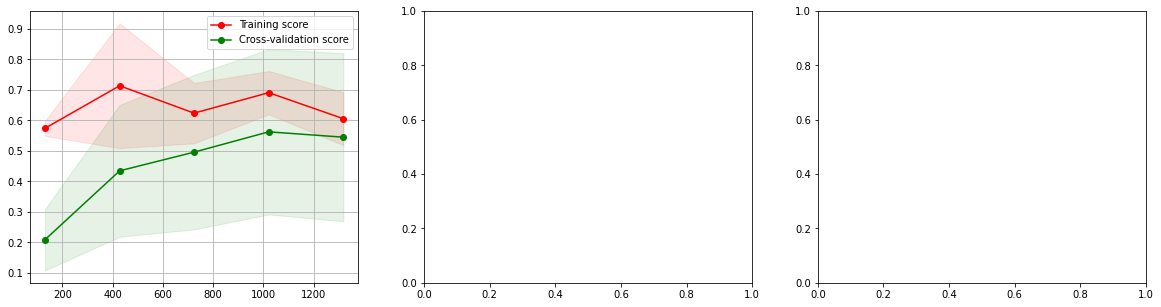

In [ ]:
print("LEARNING CURVE NN")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(nn2,trainingSet2, trainingTarget2, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

LEARNING CURVE KNN


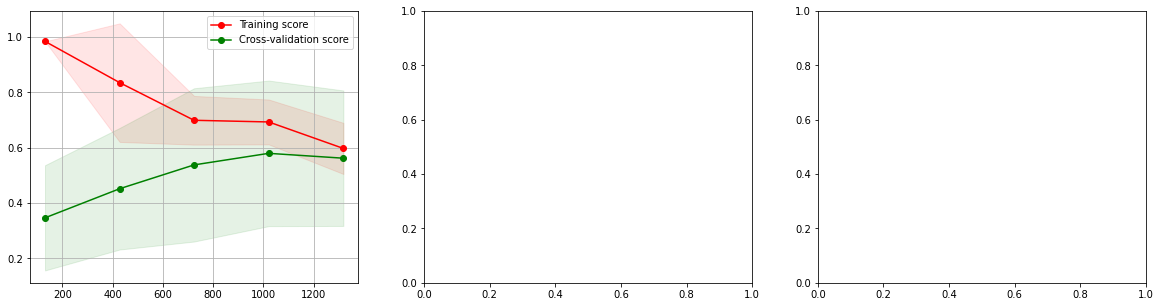

In [ ]:
print("LEARNING CURVE KNN")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(knn_clf2,trainingSet2, trainingTarget2, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

LEARNING CURVE SVM


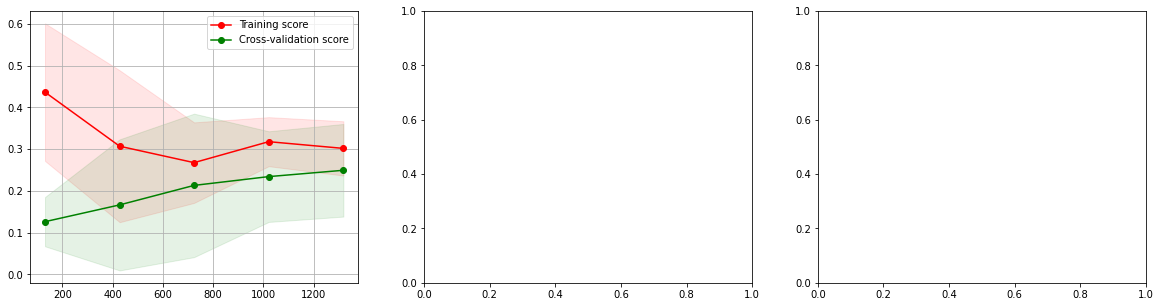

In [ ]:
print("LEARNING CURVE SVM")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(svm_clf2,trainingSet2, trainingTarget2, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

LEARNING CURVE SVM With Eng trained for Greek


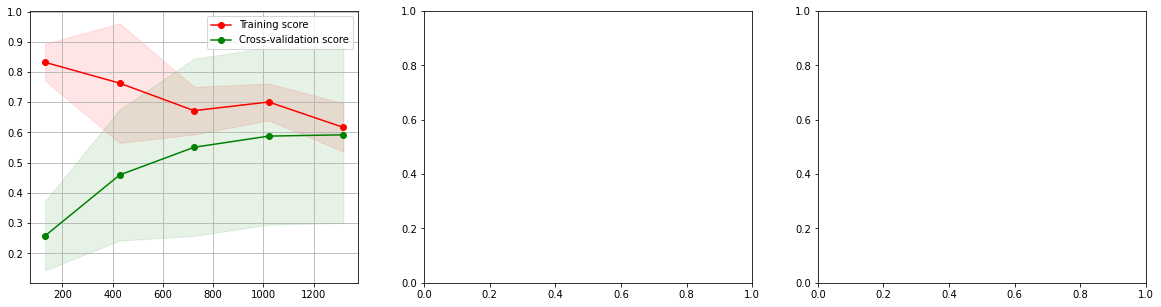

[0.92727273 0.55151515 0.43333333 0.89665653 0.15197568]


In [ ]:
print("LEARNING CURVE SVM With Eng trained for Greek")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(svm_clf,trainingSet2, trainingTarget2, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()
temp =cross_val_score(svm_clf,trainingSet2, trainingTarget2)
print(temp)

LEARNING CURVE RFC


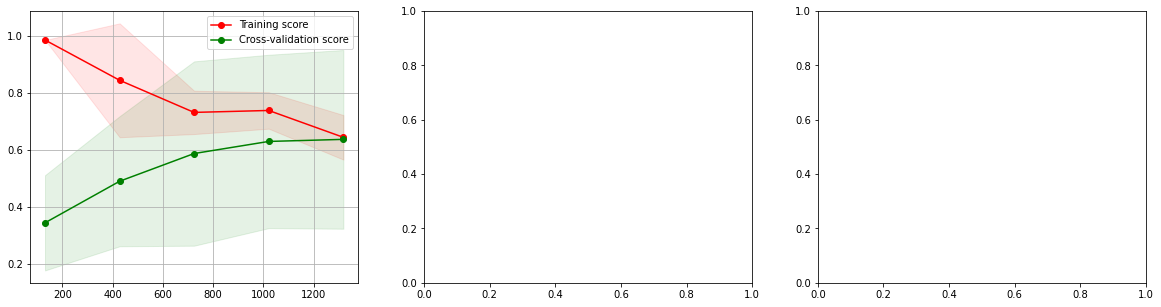

In [ ]:
print("LEARNING CURVE RFC")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(rfc2,trainingSet2, trainingTarget2, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

NN CONF MATRIX


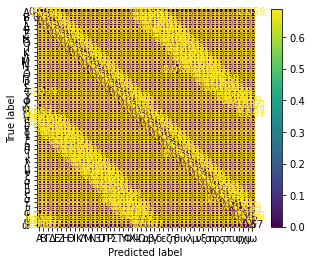

In [ ]:
from sklearn.metrics import plot_confusion_matrix
nn_cfm= plot_confusion_matrix(nn2, trainingSet2, trainingTarget2, normalize='true')
print("NN CONF MATRIX")
nn_cfm

KNN CONF MATRIX


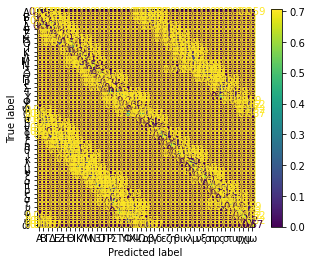

In [ ]:
knn_cfm= plot_confusion_matrix(knn_clf2, trainingSet2, trainingTarget2, normalize='true')
print("KNN CONF MATRIX")
knn_cfm

SVM CONF MATRIX


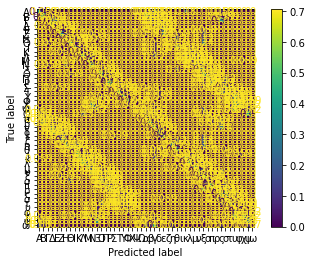

In [ ]:
svm_cfm= plot_confusion_matrix(svm_clf2, trainingSet2, trainingTarget2, normalize='true')
print("SVM CONF MATRIX")
svm_cfm

rfc CONF MATRIX


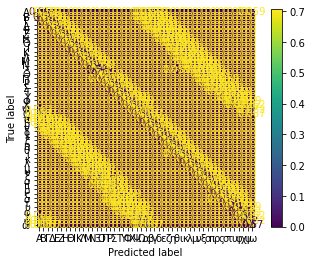

In [ ]:
rfc_cfm= plot_confusion_matrix(rfc2, trainingSet2, trainingTarget2, normalize='true')
print("rfc CONF MATRIX")
rfc_cfm

In [ ]:
print("COMPARE KNN AND SVM")
cur=classification_report(all_files_knn_class, all_files_svm_class)
print(cur)

COMPARE KNN AND SVM
              precision    recall  f1-score   support

           Α       1.00      0.88      0.93        16
           Β       0.88      0.47      0.61        30
           Γ       0.00      0.00      0.00        30
           Δ       0.11      1.00      0.20         2
           Ε       0.11      0.12      0.12        16
           Ζ       0.88      0.47      0.61        30
           Η       0.50      1.00      0.67        16
           Θ       0.33      1.00      0.50         2
           Ι       0.88      0.88      0.88        16
           Κ       0.50      1.00      0.67        16
           Λ       0.88      0.88      0.88        16
           Μ       0.89      1.00      0.94        16
           Ν       1.00      0.89      0.94        18
           Ξ       0.00      0.00      0.00        16
           Ο       0.88      0.50      0.64        28
           Π       0.88      0.88      0.88        16
           Ρ       0.88      0.47      0.61        30
       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("COMPARE KNN AND RFC")
cur=classification_report(all_files_knn_class, all_files_rfc_class)
print(cur)

COMPARE KNN AND RFC
              precision    recall  f1-score   support

           Α       1.00      1.00      1.00        16
           Β       1.00      0.53      0.70        30
           Γ       1.00      0.53      0.70        30
           Δ       0.12      1.00      0.22         2
           Ε       0.12      0.12      0.12        16
           Ζ       1.00      0.53      0.70        30
           Η       1.00      1.00      1.00        16
           Θ       0.12      1.00      0.22         2
           Ι       1.00      1.00      1.00        16
           Κ       1.00      1.00      1.00        16
           Λ       1.00      1.00      1.00        16
           Μ       1.00      1.00      1.00        16
           Ν       1.00      1.00      1.00        18
           Ξ       1.00      1.00      1.00        16
           Ο       0.88      0.50      0.64        28
           Π       1.00      1.00      1.00        16
           Ρ       1.00      0.53      0.70        30
       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("COMPARE RFC AND MLP")
cur=classification_report(all_files_rfc_class, all_files_mlp_class)
print(cur)

COMPARE RFC AND MLP
              precision    recall  f1-score   support

           Α       1.00      1.00      1.00        16
           Β       0.89      1.00      0.94        16
           Γ       1.00      1.00      1.00        16
           Δ       1.00      0.88      0.93        16
           Ε       1.00      1.00      1.00        16
           Ζ       1.00      1.00      1.00        16
           Η       1.00      1.00      1.00        16
           Θ       1.00      1.00      1.00        16
           Ι       1.00      1.00      1.00        16
           Κ       1.00      1.00      1.00        16
           Λ       1.00      1.00      1.00        16
           Μ       1.00      1.00      1.00        16
           Ν       1.00      1.00      1.00        18
           Ξ       1.00      1.00      1.00        16
           Ο       1.00      0.88      0.93        16
           Π       1.00      1.00      1.00        16
           Ρ       1.00      1.00      1.00        16
       

In [ ]:
print("COMPARE MLP AND SVM")
cur=classification_report(all_files_mlp_class, all_files_svm_class)
print(cur)

COMPARE MLP AND SVM
              precision    recall  f1-score   support

           Α       1.00      0.88      0.93        16
           Β       0.88      0.78      0.82        18
           Γ       0.00      0.00      0.00        16
           Δ       0.78      1.00      0.88        14
           Ε       0.89      1.00      0.94        16
           Ζ       0.88      0.88      0.88        16
           Η       0.50      1.00      0.67        16
           Θ       0.33      0.12      0.18        16
           Ι       0.88      0.88      0.88        16
           Κ       0.50      1.00      0.67        16
           Λ       0.88      0.88      0.88        16
           Μ       0.89      1.00      0.94        16
           Ν       1.00      0.89      0.94        18
           Ξ       0.00      0.00      0.00        16
           Ο       0.88      1.00      0.93        14
           Π       0.88      0.88      0.88        16
           Ρ       0.88      0.88      0.88        16
       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
